In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_excel('./AirQualityUCI.xlsx')
data.head()

,Date,Time,Averaged_concentrationCO(GT),averaged_sensor_responsePT08.S1(CO),Non_Metanic_HydroCarbons_concentration(GT),Benzene_concentrationC6H6(GT),titania_PT08.S2(NMHC),NOx concentration(GT),Tungsten_oxidePT08.S3(NOx),NO2_concentration(GT),Tungsten_oxidePT08.S4(NO2),Indium_oxide_PT08.S5(O3),Temp,Relative_Humidity,AbsoluteHumidity,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [4]:
data.columns

Index(['Date', 'Time', 'Averaged_concentrationCO(GT)',
       'averaged_sensor_responsePT08.S1(CO)',
       'Non_Metanic_HydroCarbons_concentration(GT)',
       'Benzene_concentrationC6H6(GT)', 'titania_PT08.S2(NMHC)',
       'NOx concentration(GT)', 'Tungsten_oxidePT08.S3(NOx)',
       'NO2_concentration(GT)', 'Tungsten_oxidePT08.S4(NO2)',
       'Indium_oxide_PT08.S5(O3)', 'Temp', 'Relative_Humidity',
       'AbsoluteHumidity', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [5]:
data.drop(labels=['Date', 'Time','AbsoluteHumidity', 'Unnamed: 15', 'Unnamed: 16'],
         axis=1, inplace=True)

In [6]:
data.head(1)

,Averaged_concentrationCO(GT),averaged_sensor_responsePT08.S1(CO),Non_Metanic_HydroCarbons_concentration(GT),Benzene_concentrationC6H6(GT),titania_PT08.S2(NMHC),NOx concentration(GT),Tungsten_oxidePT08.S3(NOx),NO2_concentration(GT),Tungsten_oxidePT08.S4(NO2),Indium_oxide_PT08.S5(O3),Temp,Relative_Humidity
0,2.6,1360.0,150,11.881723,1045.5,166.0,1056.25,113.0,1692.0,1267.5,13.6,48.875001


In [7]:
data.isnull().sum()

Averaged_concentrationCO(GT)                  0
averaged_sensor_responsePT08.S1(CO)           0
Non_Metanic_HydroCarbons_concentration(GT)    0
Benzene_concentrationC6H6(GT)                 0
titania_PT08.S2(NMHC)                         0
NOx concentration(GT)                         0
Tungsten_oxidePT08.S3(NOx)                    0
NO2_concentration(GT)                         0
Tungsten_oxidePT08.S4(NO2)                    0
Indium_oxide_PT08.S5(O3)                      0
Temp                                          0
Relative_Humidity                             0
dtype: int64

In [8]:
# correlation
corrData= data.corr()

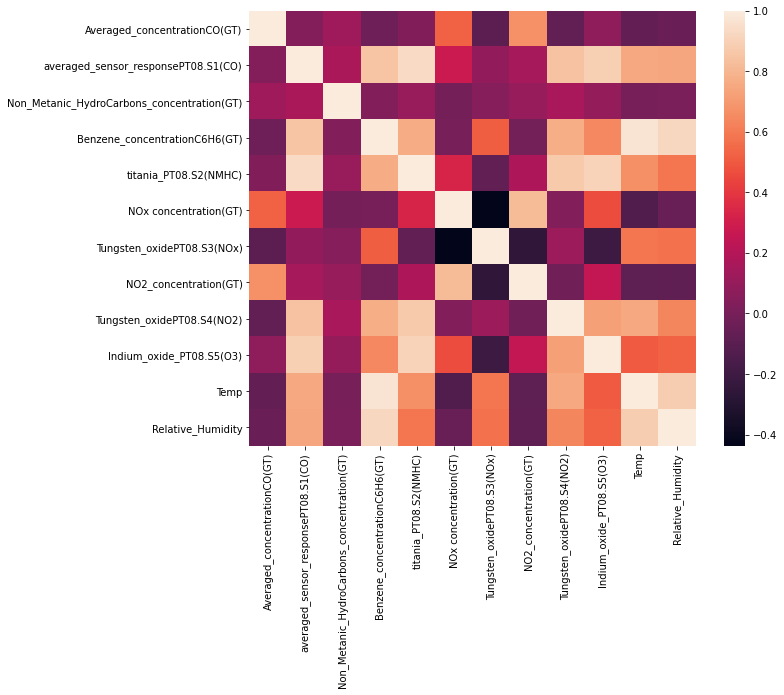

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corrData)
plt.show()

In [10]:
# split the data into x and y
x= data.iloc[:,:-1]
y= data.iloc[:,-1]

In [11]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=10)

In [12]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=1.0)

In [13]:
lasso.fit(x_train, y_train)

Lasso()

In [14]:
y_pred= lasso.predict(x_test)

In [15]:
y_pred

array([  48.10783946, -206.95138594,   68.07136479, ...,   51.19403386,
         65.53430768,   61.14639194])

In [16]:
# Slope
lasso.coef_

array([ 0.00718543,  0.01388647, -0.01215467,  3.36608476, -0.18671896,
        0.02200232, -0.03481876, -0.0396028 ,  0.05197179,  0.00499387,
       -1.45893083])

In [17]:
# intercept
lasso.intercept_

147.35269874333466

In [18]:
# mean Square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

92.16571859433499

In [19]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

9.60029783883474

In [20]:
# R Square
lasso.score(x_test, y_test)

0.9594682278142834

### when Alpha is more than 1.0

In [30]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=3.0)

In [31]:
lasso.fit(x_train, y_train)

Lasso(alpha=3.0)

In [32]:
y_pred= lasso.predict(x_test)

In [33]:
y_pred

array([  47.62200846, -206.76408726,   67.41911902, ...,   50.82232373,
         65.70205326,   60.60939524])

In [34]:
# Slope
lasso.coef_

array([ 0.00658939,  0.01759595, -0.0117207 ,  3.18040848, -0.1819576 ,
        0.02292174, -0.03174509, -0.04104804,  0.04892518,  0.00645944,
       -1.32773323])

In [35]:
# intercept
lasso.intercept_

138.61328480349016

In [36]:
# mean Square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

93.63024415752822

In [37]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

9.676272224236367

In [38]:
# R Square
lasso.score(x_test, y_test)

0.958824172547392